#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [1]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [52]:
import numpy as np
def spacing(b, p, t=53):
    return b**(p+1-t)
print(spacing(2, 52))

x=2**52
print(x)
print(x + 0.5)
y = x + spacing(2, 52)
print(y)
print(y + 0.5) #q

#rounding to even-> y+0.5 viene arrotondato al numero successivo poiché viene portato ad un numero pari
#se la cifra a.t+1 è pari rimane com'è se è dispari viene arrotondata a pari

1
4503599627370496
4503599627370496.0
4503599627370497
4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [53]:
import sys
#𝐹 = 2 * (𝛽 − 1) * 𝛽 𝑡−1 * (𝑈 − 𝐿 + 1) + 1
cardF = 2 * (2**(53) - 2**(53-1)) * (1023 - (-1022) + 1) + 1
cardF

18428729675200069633

- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [62]:
eps=2**-52
mindiesp=eps/2
print('somma con eps e somma con valore < di eps:', 1+eps, 1+mindiesp)
s = spacing(2, 0)
x = 1
print(spacing(2,0))
print(x+s)
print(x+(s/2))
print('controllo', eps-s) #sono uguali quindi eps= 2**-52 che è la precisione di macchina

somma con eps e somma con valore < di eps: 1.0000000000000002 1.0
2.220446049250313e-16
1.0000000000000002
1.0
controllo 0.0


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [64]:
import numpy as np
arr=np.array([0.1]*10)
print(a)
r=0
for e in arr:
    r+=e
print(r)
print(np.sum(arr, axis=0))
#il risultato è diverso perché 0.1 non è un numero macchina -> non è rappresentato esattamente perché 0.1 in base 2 è 0.1 = 0.000110011001100..... 
#---> in base 2 è periodico con periodo '0011' dopo lo '0.0' quindi viene approssimato (si genera un errore)
#---> np.sum è implementata in modo più accurato e quindi facendo la somma dieci volte di 0.1 il risultato è effettivamente 1.0

2.3371258e-05
0.9999999999999999
1.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [65]:
#addizione non gode proprietà associativa / commutativa
a = 1.234567890123400e+15
b = -1.234567890123400e+15
c = 0.06
print(a, '\t', b, '\t', c)
print((a + b) + c)
print((a + c) + b)
print((b + c) + a)

a = 0.23371258e-4
b = 0.33678429e+2
c = -0.33677911e+2
print(a, '\t', b, '\t', c)
print((a + b) + c)
print((a + c) + b)
print((b + c) + a)

1234567890123400.0 	 -1234567890123400.0 	 0.06
0.06
0.0
0.0
2.3371258e-05 	 33.678429 	 -33.677911
0.0005413712580022434
0.0005413712580022434
0.0005413712579995743


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [115]:
y1 = lambda x: np.sqrt((x**2) + 1) - x
y2 = lambda x: 1 / (np.sqrt((x**2) + 1) + x)
print('n=7777:', y1(7777), '\t', y2(7777))
print('n=77777777:', y1(77777777), '\t', y2(7777777))
#l'errore nasce dalla differenza poiché ci sono dei numeri in modulo vicini, razionalizzando si trasforma la differenza in una somma per cui l'operazione pericolosa scompare

n=7777: 6.429214317904552e-05 	 6.429214323431402e-05
n=77777777: 0.0 	 6.428572071428609e-08


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

spacing: [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863e-06 1.52587891e-05
 1.22070312e-04 1.95312500e-03 1.56250000e-02 1.25000000e-01
 2.00000000e+00 1.60000000e+01 1.28000000e+02 2.04800000e+03
 1.63840000e+04]
errore: [0.00000000e+00 3.81639165e-16 8.21283146e-16 2.16209395e-14
 6.38647291e-14 6.25044601e-13 1.07548935e-10 9.28145750e-10
 1.03187712e-08 1.50211282e-07 6.14600376e-07 3.17244773e-08
 4.84358805e-05 9.06716545e-04 6.03525942e-03 1.39238685e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


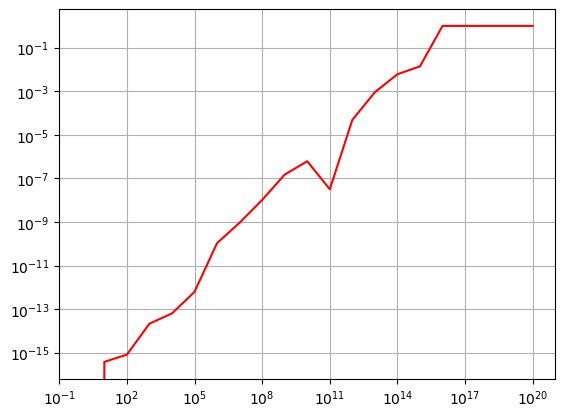

In [108]:
import matplotlib.pyplot as plt
A = lambda x: ((1/x) - (1/(x+1)))
B = lambda x: (1/(x*(x+1)))
x = 10.0**np.arange(0,21)
y=A(x)
z=B(x) #con 10**x per x che aumentano anche lo spacing aumenta gradualmente a tal punto che sommando certi numeri non si ottiene un incremento per cui facendo la differenza 
sp=np.spacing(x)
print('spacing:', sp)
err=(np.abs(z-y)/np.abs(z))
print('errore:', err)
plt.loglog(x,err,color='r')
plt.grid(True)
plt.show()

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

In [88]:
x1 = lambda k: x**2 + x*10**k + 1
x2 = lambda k:
k = np.arange(1,9)
f(k)

ValueError: operands could not be broadcast together with shapes (21,) (8,) 

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.